In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


# Smaller City Hospitals Compared to the Larger City Hospitals and Their Economic Impact
## Claire Sanner

The point of this report is to prove that investing $10 million into a smaller city because it will help their economic impact. My focus will be putting money into the Chautauqua county hospitals, mainly Brooks Memorial in Dunkirk, NY. Dunkirk is considered to have low economic status because they have low income, high unemployment, high poverty rates, and population loss.I will be analyzing various datasets that I have merged together to show the investing money into the Brooks Memorial help will change Dunkirk's and the surrounding towns around them economic status. I chose this project because I went to college at SUNY Fredonia and I never felt that the hospitals there were well equipped to handle anything. Most of the people from the town of Fredonia, Dunkirk and other neighboring town felt the same way. If we could invest in smaller hospitals, the money not only does it have the possibility to create jobs and help with the unemployment rate. It might also give the citizens a sense of security that the hospital will handle any emergency that they will have. 

In [4]:
Hospitals = pd.read_csv('HospitalsNY.csv', error_bad_lines=False) # This code brings in the data for the information on the hospitals
del Hospitals["POPULATION"] # This code is to delete on of the columns that we did not need to use
Hospitals = Hospitals.rename(columns = {"Region":"Metro Area"}) # This code will rename the one of the columns from "Region" to "Metro Area". This is so later on it can be merged with other datasets 
Hospitals.head() # This will show just the first 5 lines of the data.
# If done correctly you will have a dataset with NAME, ADDRESS, CITY, STATE, ZIP, STATUS, COUNTY, BEDS, TRAUMA, HELIPAD, and METRO AREA
# The first hospital name should be AlBANY MEDICAL CENTER-SOUTH CLINICAL CAMPUS

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,Metro Area
0,ALBANY MEDICAL CENTER - SOUTH CLINICAL CAMPUS,"25 HACKETT BOULEVARD,MC 201",ALBANY,NY,12204,OPEN,ALBANY,18,NOT AVAILABLE,Y,Albany-Schenectady-Troy
1,ALBANY MEMORIAL HOSPITAL,600 NORTHERN BLVD,ALBANY,NY,12204,OPEN,ALBANY,165,NOT AVAILABLE,NOT AVAILABLE,Albany-Schenectady-Troy
2,ST. PETER'S HOSPITAL,315 S MANNING BLVD,ALBANY,NY,12208,OPEN,ALBANY,442,NOT AVAILABLE,NOT AVAILABLE,Albany-Schenectady-Troy
3,ALBANY MEDICAL CENTER,43 NEW SCOTLAND AVE,ALBANY,NY,12208,OPEN,ALBANY,716,I,Y,Albany-Schenectady-Troy
4,BROOKS MEMORIAL HOSPITAL,529 CENTRAL AVE,DUNKIRK,NY,14048,OPEN,CHAUTAUQUA,65,NOT AVAILABLE,NOT AVAILABLE,Jamestown-Dunkirk-Fredonia


In [5]:
unemploymentrates = pd.read_csv('unemploymentrates.csv') # This brings in the data for the unemployment rate 
unemploymentrates.head() # This is so that we see the first 5 row of the column
# When done correctly, we will see the unemployment data. The rows will be "Metro Area", "Average Labor Force", "Average Employed", "Average Unemployed", "Average Unemployment Rate" and the first row will be Albany-Schenectady 

,Metro Area,Average Labor Force,Average Employed,Average Unemployed,Average Unemployment Rate
0,Albany-Schenectady-Troy,452831,426663,26170,5.7757
1,Binghamton,131444,121938,9506,7.0419
2,Buffalo-Niagara Falls,561132,522375,38761,6.8829
3,Glens Falls,62727,58420,4314,6.8353
4,Ithaca,65725,62219,3517,5.1008


In [6]:
mergednew = pd.merge(Hospitals, unemploymentrates, on='Metro Area', how = 'inner') # This is to do our first join with the data
mergednew.head() # We wll see the first five rows of the data
# Here we will see the combination of all of the data we have brought in so far. The first row should be ALBANY MEDICAL CENTER-SOUTH CLINICAL CAMPUS

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,Metro Area,Average Labor Force,Average Employed,Average Unemployed,Average Unemployment Rate
0,ALBANY MEDICAL CENTER - SOUTH CLINICAL CAMPUS,"25 HACKETT BOULEVARD,MC 201",ALBANY,NY,12204,OPEN,ALBANY,18,NOT AVAILABLE,Y,Albany-Schenectady-Troy,452831,426663,26170,5.7757
1,ALBANY MEMORIAL HOSPITAL,600 NORTHERN BLVD,ALBANY,NY,12204,OPEN,ALBANY,165,NOT AVAILABLE,NOT AVAILABLE,Albany-Schenectady-Troy,452831,426663,26170,5.7757
2,ST. PETER'S HOSPITAL,315 S MANNING BLVD,ALBANY,NY,12208,OPEN,ALBANY,442,NOT AVAILABLE,NOT AVAILABLE,Albany-Schenectady-Troy,452831,426663,26170,5.7757
3,ALBANY MEDICAL CENTER,43 NEW SCOTLAND AVE,ALBANY,NY,12208,OPEN,ALBANY,716,I,Y,Albany-Schenectady-Troy,452831,426663,26170,5.7757
4,THE BURDETT CARE CENTER,2215 BURDETT AVENUE,TROY,NY,12180,OPEN,RENSSELAER,15,NOT AVAILABLE,NOT AVAILABLE,Albany-Schenectady-Troy,452831,426663,26170,5.7757


In [22]:
deathrates = pd.read_csv('Deathrates.csv') # This is to bring in the Death rates dataset
deathrates=deathrates.apply(lambda x: x.astype(str).str.upper()) # This is to make the all of the contents of the dataset uppercase to make it easier to merge later
deathrates = deathrates.rename(columns = {"County":"COUNTY"}) # This is to rename a column "County" to "COUNTY" so that it will also be uppercase and easier to merge later on
deathrates.head() # This is so that we can see the first five rows in the dataset
# We should see the columns of "COUNTY", "2009", "2010", "2011", "2012", "2013","2014", "2015", "2016" and the first row should be ALBANY

,COUNTY,2009,2010,2011,2012,2013,2014,2015,2016
0,ALBANY,8.7,8.4,8.9,8.9,8.5,8.2,8.8,8.7
1,ALLEGANY,8.9,8.5,9.9,9.7,9.6,9.4,10.7,9.9
2,BROOME,10.7,10.1,10.5,10.2,10.6,10.4,10.9,10.4
3,CATTARAUGUS,10.1,10.8,10.0,9.7,9.9,10.1,11.3,10.1
4,CAYUGA,8.6,9.1,9.2,9.7,8.8,9.4,10.4,9.8


In [8]:
mergedfinal = pd.merge(mergednew, deathrates, on='COUNTY', how = 'inner')
mergedfinal[["Average Unemployment Rate"]] = mergedfinal[["Average Unemployment Rate"]].apply(pd.to_numeric)
mergedfinal = mergedfinal.rename(columns = {"Average Unemployment Rate":"Average_Unemployment_Rate"})
mergedfinal.dropna()
mergedfinal.head()

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
0,ALBANY MEDICAL CENTER - SOUTH CLINICAL CAMPUS,"25 HACKETT BOULEVARD,MC 201",ALBANY,NY,12204,OPEN,ALBANY,18,NOT AVAILABLE,Y,...,26170,5.7757,8.7,8.4,8.9,8.9,8.5,8.2,8.8,8.7
1,ALBANY MEMORIAL HOSPITAL,600 NORTHERN BLVD,ALBANY,NY,12204,OPEN,ALBANY,165,NOT AVAILABLE,NOT AVAILABLE,...,26170,5.7757,8.7,8.4,8.9,8.9,8.5,8.2,8.8,8.7
2,ST. PETER'S HOSPITAL,315 S MANNING BLVD,ALBANY,NY,12208,OPEN,ALBANY,442,NOT AVAILABLE,NOT AVAILABLE,...,26170,5.7757,8.7,8.4,8.9,8.9,8.5,8.2,8.8,8.7
3,ALBANY MEDICAL CENTER,43 NEW SCOTLAND AVE,ALBANY,NY,12208,OPEN,ALBANY,716,I,Y,...,26170,5.7757,8.7,8.4,8.9,8.9,8.5,8.2,8.8,8.7
4,THE BURDETT CARE CENTER,2215 BURDETT AVENUE,TROY,NY,12180,OPEN,RENSSELAER,15,NOT AVAILABLE,NOT AVAILABLE,...,26170,5.7757,9.6,9.2,9.3,9.4,9.0,9.1,9.5,9.2


# Unemployment Rates

Text(0.5,1,'Graph Number One, County vs Average Unemployment Rate')

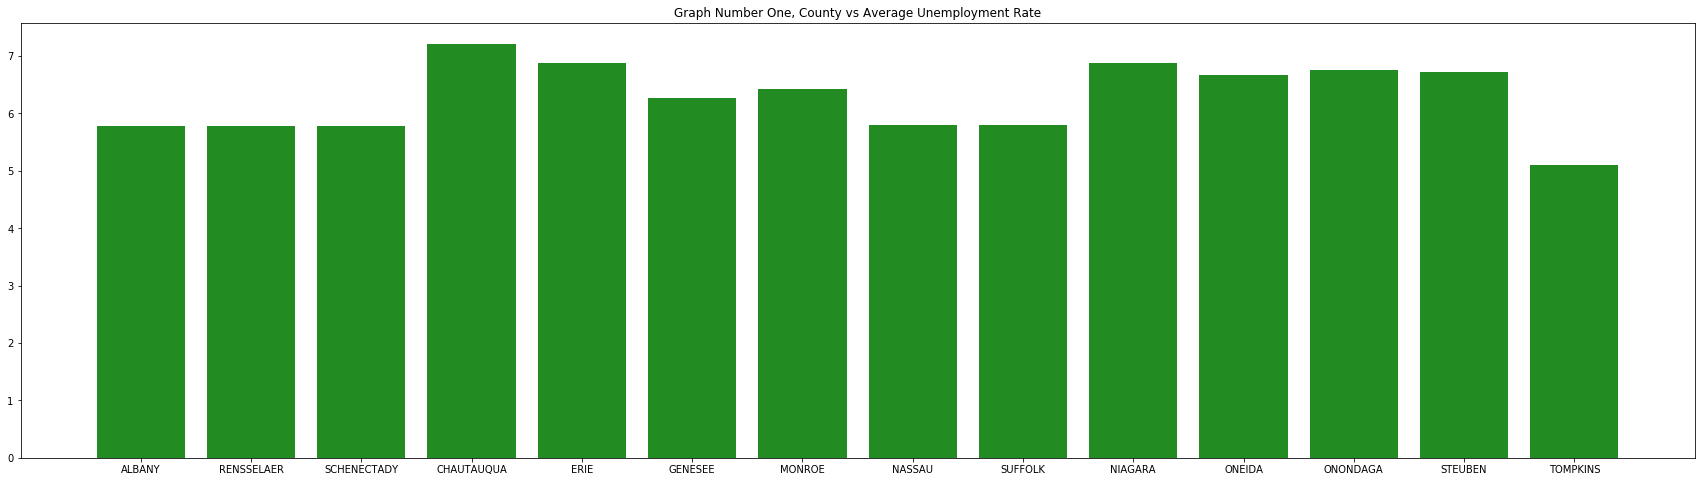

In [9]:
plt.figure(figsize=(30,8)) # This is to create the size of the bar graph
plt.bar(mergedfinal['COUNTY'],mergedfinal['Average_Unemployment_Rate'], color='forestgreen') # This is to actually to create the graph comparing the County and Average Unemployment Rate
plt.title("Graph Number One, County vs Average Unemployment Rate") # This is simply to create the title of the graph
# The final result should be a graph that compares the counties and the unemployment rate. The first bar will be Albany with a little less than 6% unemployment rate

In the graph number one, above, we can see the Chautauqua has highest unemployment rates compared to all of the other counties. If you look at the rest of the counties, we can also see that the ones with the bigger hospitals tend to have lower unemployment rates. Even Erie County has higher unemployment rates than counties with bigger hospitals such as Albany. Looking at how big each hospital is based on how many each bed there does seem to be a correlation with unemployment. Looking at the data, there does seem to be a correlation between how big the Hospitals are in the county and what the unemployment rate is. If we were to take the $10 million and invest it into Brooks Memorial, which is in Chautauqua County, and update it then it is possible that the unemployment rate will decrease, based on the findings above. 

In [10]:
mergedfinal.loc[mergedfinal['COUNTY'] == "MONROE"] # Here you can replace "MONROE" with any County to see the information on the hospitals within a county. Be sure when you replace "MONROE" the the County name is capitize

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
29,MONROE COMMUNITY HOSPITAL,435 E HENRIETTA RD,ROCHESTER,NY,14620,OPEN,MONROE,39,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
30,THE UNITY HOSPITAL OF ROCHESTER-ST MARYS CAMPUS,89 GENESEE STREET,ROCHESTER,NY,14611,OPEN,MONROE,40,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
31,HIGHLAND HOSPITAL,1000 SOUTH AVE,ROCHESTER,NY,14620,OPEN,MONROE,261,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
32,THE UNITY HOSPITAL OF ROCHESTER,1555 LONG POND ROAD,ROCHESTER,NY,14626,OPEN,MONROE,311,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
33,ROCHESTER GENERAL HOSPITAL,1425 PORTLAND AVE,ROCHESTER,NY,14621,OPEN,MONROE,528,NOT AVAILABLE,Y,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
34,STRONG MEMORIAL HOSPITAL,601 ELMWOOD AVE,ROCHESTER,NY,14607,OPEN,MONROE,830,"I, I PEDIATRIC",Y,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8


Text(0.5,1,'Graph Number Two, City vs Average Unemployment Rate')

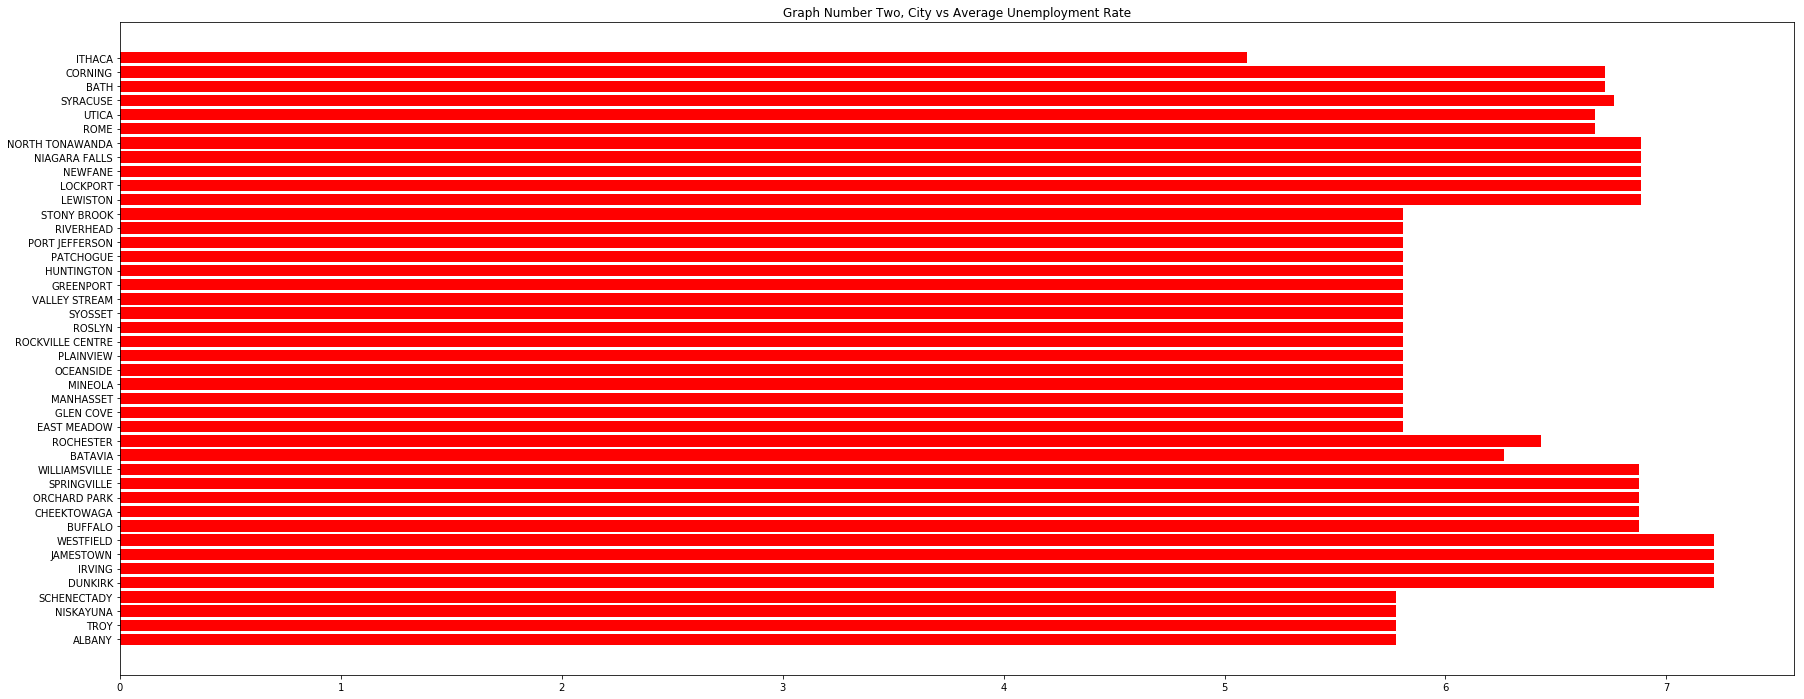

In [11]:
plt.figure(figsize=(30,12)) # This make the size of the graph
plt.barh(mergedfinal['CITY'],mergedfinal['Average_Unemployment_Rate'], color='red') # This is to create the graph comparing the Cities with the Average Unemployment Rate
plt.title("Graph Number Two, City vs Average Unemployment Rate") # This is to create the title of the graph
# When done correctly we should see a horizontal bar graph that shows the unemployment rate of each city. The first one should be Ithaca with an unemployment rate of about 5% 

In the graph above, Graph Number Two, City vs Average Unemployment Rate, although hard to read, we can still see the same pattern of cities with bigger hospitals have a lower unemployment rate. We can see that places such as Albany and Rochester have higher unemployment rate and bigger hospitals than places like Dunkirk, Irving, and Jamestown who have smaller hospitals. We can see the correlation between the cities with bigger hospitals have lower unemployment rates just as we saw the correlation in the counties to unemployment rates.  

In [12]:
mergedfinal.loc[mergedfinal["CITY"] == "ROCHESTER"] # This is so you can replace the City and see what hospitals are within that city. When you replace the city be sure to capitalize the city you choose to take a closer look at. 

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
29,MONROE COMMUNITY HOSPITAL,435 E HENRIETTA RD,ROCHESTER,NY,14620,OPEN,MONROE,39,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
30,THE UNITY HOSPITAL OF ROCHESTER-ST MARYS CAMPUS,89 GENESEE STREET,ROCHESTER,NY,14611,OPEN,MONROE,40,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
31,HIGHLAND HOSPITAL,1000 SOUTH AVE,ROCHESTER,NY,14620,OPEN,MONROE,261,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
32,THE UNITY HOSPITAL OF ROCHESTER,1555 LONG POND ROAD,ROCHESTER,NY,14626,OPEN,MONROE,311,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
33,ROCHESTER GENERAL HOSPITAL,1425 PORTLAND AVE,ROCHESTER,NY,14621,OPEN,MONROE,528,NOT AVAILABLE,Y,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
34,STRONG MEMORIAL HOSPITAL,601 ELMWOOD AVE,ROCHESTER,NY,14607,OPEN,MONROE,830,"I, I PEDIATRIC",Y,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8


Text(0.5,1,'Graph Number Three, Metro-Area vs Average Unemployment Rate')

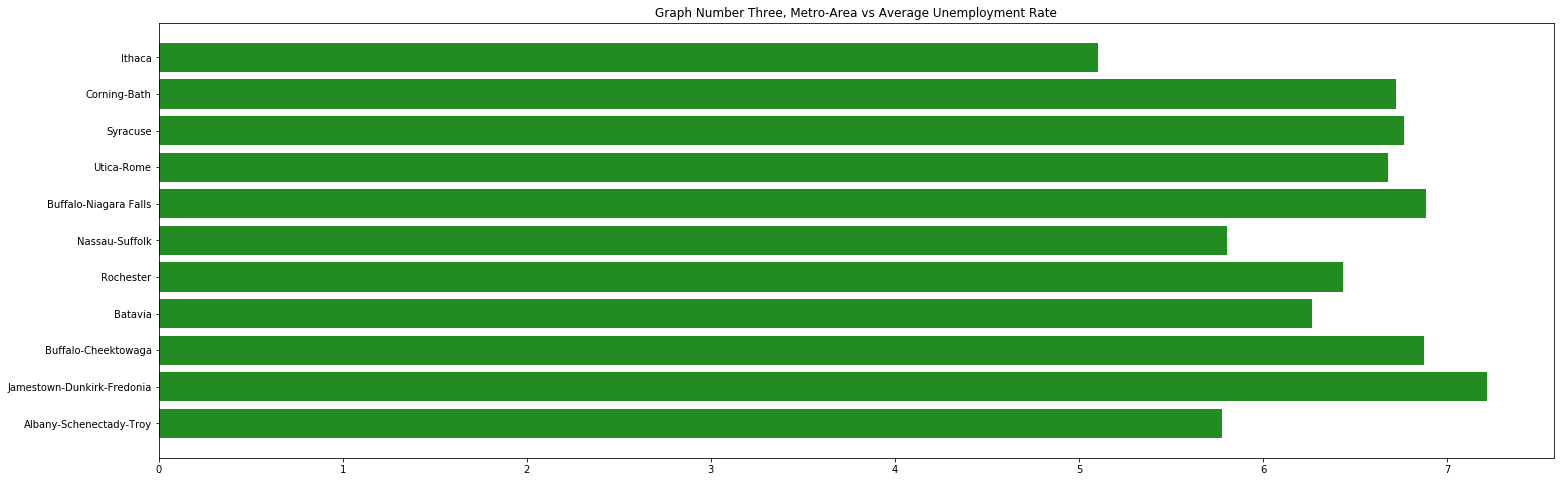

In [13]:
plt.figure(figsize=(25,8)) # We are creating the size for the graph
plt.barh(mergedfinal['Metro Area'],mergedfinal['Average_Unemployment_Rate'], color='forestgreen') # This is creating the graph comparing the "Metro Area" and "Average Unemployment Rate"
plt.title("Graph Number Three, Metro-Area vs Average Unemployment Rate") # This is creating the title for the graph
# The results will be a graph that compares the Metro Area and their Unemployment Rates. The first one will be Ithaca and the unemployment rate will be 5%

In Graph Number Four, Metro Area vs Average Unemployment shows that even with using the metro-area that James-Dunkirk-Fredonia the highest unemployment rate compared to other metro areas such as Nassau-Suffolk who have bigger hospitals. We can see that there is a correlation between metro areas and unemployment rates. Investing the money into Brooks Memorial, although one hospital could have on the status of the Dunkirk area. People who live in any of the surrounding towns such as Fredonia, Forestville, and Irving also have the possibility to get a job at the Brooks Memorial once the money has been invested. 

In [14]:
mergedfinal.loc[mergedfinal["Metro Area"] == "Nassau-Suffolk"] # This is so you can replace the Metro Area and see what hospitals are within that Metro-Area. When you replace the city be sure to capitalize the Metro-Area you choose to take a closer look at. 

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
35,NASSAU UNIVERSITY MEDICAL CENTER,2201 HEMPSTEAD TPKE,EAST MEADOW,NY,11554,OPEN,NASSAU,530,I,Y,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
36,GLEN COVE HOSPITAL,101 ST ANDREWS LANE,GLEN COVE,NY,11542,OPEN,NASSAU,247,NOT AVAILABLE,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
37,NORTH SHORE UNIVERSITY HOSPITAL,300 COMMUNITY DR,MANHASSET,NY,11030,OPEN,NASSAU,764,I,Y,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
38,WINTHROP-UNIVERSITY HOSPITAL,259 FIRST STREET,MINEOLA,NY,11501,OPEN,NASSAU,591,I,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
39,SOUTH NASSAU COMMUNITIES HOSPITAL,1 HEALTHY WAY,OCEANSIDE,NY,11510,OPEN,NASSAU,455,II,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
40,PLAINVIEW HOSPITAL,888 OLD COUNTRY RD,PLAINVIEW,NY,11803,OPEN,NASSAU,219,NOT AVAILABLE,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
41,MERCY MEDICAL CENTER,1000 N VILLAGE AVE,ROCKVILLE CENTRE,NY,11530,OPEN,NASSAU,375,NOT AVAILABLE,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
42,SAINT FRANCIS HOSPITAL,100 PORT WASHINGTON BLVD,ROSLYN,NY,11548,OPEN,NASSAU,364,NOT AVAILABLE,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
43,SYOSSET HOSPITAL,221 JERICHO TPKE,SYOSSET,NY,11791,OPEN,NASSAU,103,NOT AVAILABLE,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1
44,LONG ISLAND JEWISH VALLEY STREAM,900 FRANKLIN AVE,VALLEY STREAM,NY,11580,OPEN,NASSAU,330,NOT AVAILABLE,NOT AVAILABLE,...,85585,5.806,7.7,7.9,8.0,8.2,7.8,7.8,8.1,8.1


# Death Rates

Text(0.5,1,'Graph Number Six, Death Rates vs City')

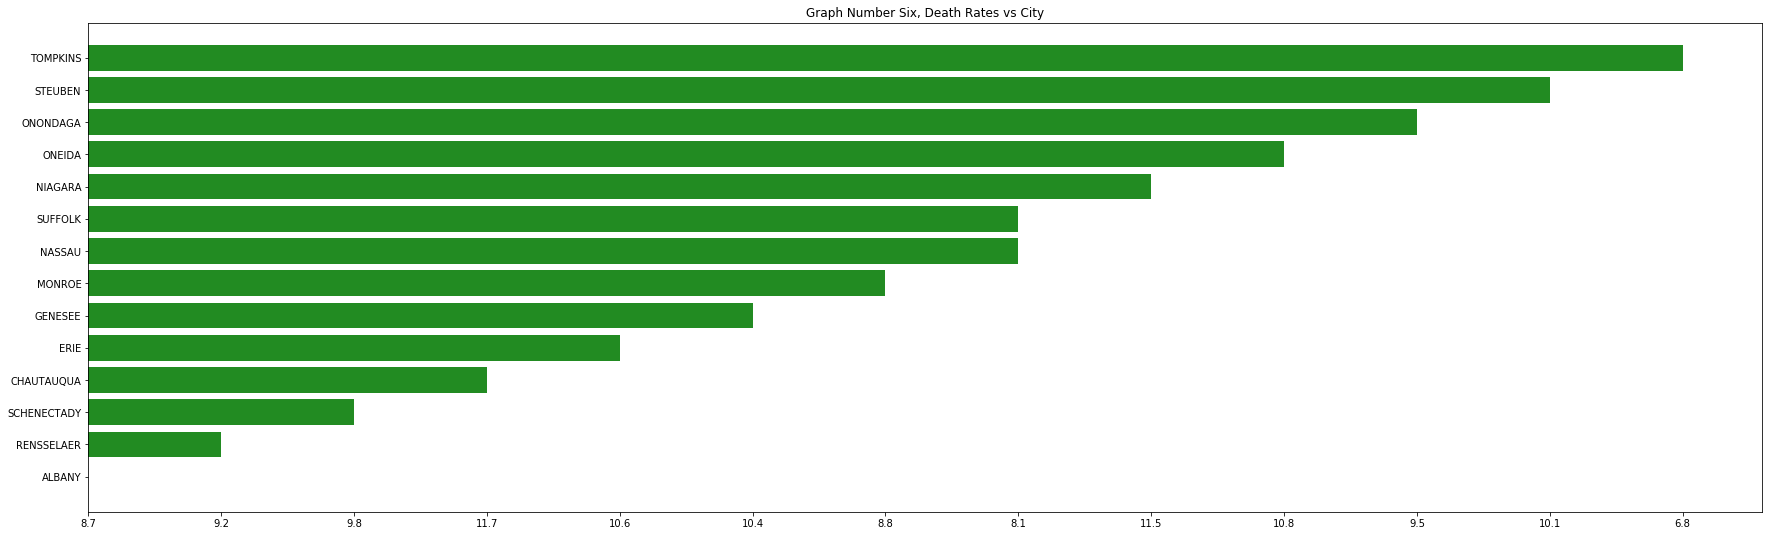

In [28]:
plt.figure(figsize=(30,9)) # This is setting the size of the graph
plt.barh(mergedfinal['COUNTY'],mergedfinal['2016'], color='forestgreen') # This is creating the graph comparing the Counties and Unemployment Rates for 2016
plt.title('Graph Number Six, Death Rates vs City') # This is creating the title for the graph 
# The result should be a graph that compares the City and the death rate for each. (I still have to fix the X-Axis so be careful when reading the graph). The first one will be Ithaca with a death rate of 6.8%


In the graph above we can see, although hard to tell I plan on fixing the Y-axis, we can see that the counties with bigger hospitals have also seem to have a lower death rate. Places such as Niagara County and Erie County have lower death rates even though they have cities which are considered to be dangerous such as Buffalo and Niagara Falls. Looking at the data, we can see that the difference is only about 1% but 1% of 20,000 is 200. Even then it doesn't seem like a huge difference but that is 200 lives that could have been saved and people who could have their lives if they had the right treatment of the hospital they were taken to.

In [27]:
mergedfinal.loc[mergedfinal["COUNTY"] == "RENSSELAER"] # Here you can change the County, make sure to capitlize the County, so that you can see the the information within such as the hospital infomration and the death rates. 

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
4,THE BURDETT CARE CENTER,2215 BURDETT AVENUE,TROY,NY,12180,OPEN,RENSSELAER,15,NOT AVAILABLE,NOT AVAILABLE,...,26170,5.7757,9.6,9.2,9.3,9.4,9.0,9.1,9.5,9.2
5,ST MARY'S HOSPITAL,1300 MASSACHUSETTS AVE,TROY,NY,12180,OPEN,RENSSELAER,196,NOT AVAILABLE,NOT AVAILABLE,...,26170,5.7757,9.6,9.2,9.3,9.4,9.0,9.1,9.5,9.2
6,SAMARITAN HOSPITAL,2215 BURDETT AVE,TROY,NY,12180,OPEN,RENSSELAER,212,NOT AVAILABLE,NOT AVAILABLE,...,26170,5.7757,9.6,9.2,9.3,9.4,9.0,9.1,9.5,9.2


Text(0.5,1,'Graph Number Six, Death Rates vs City')

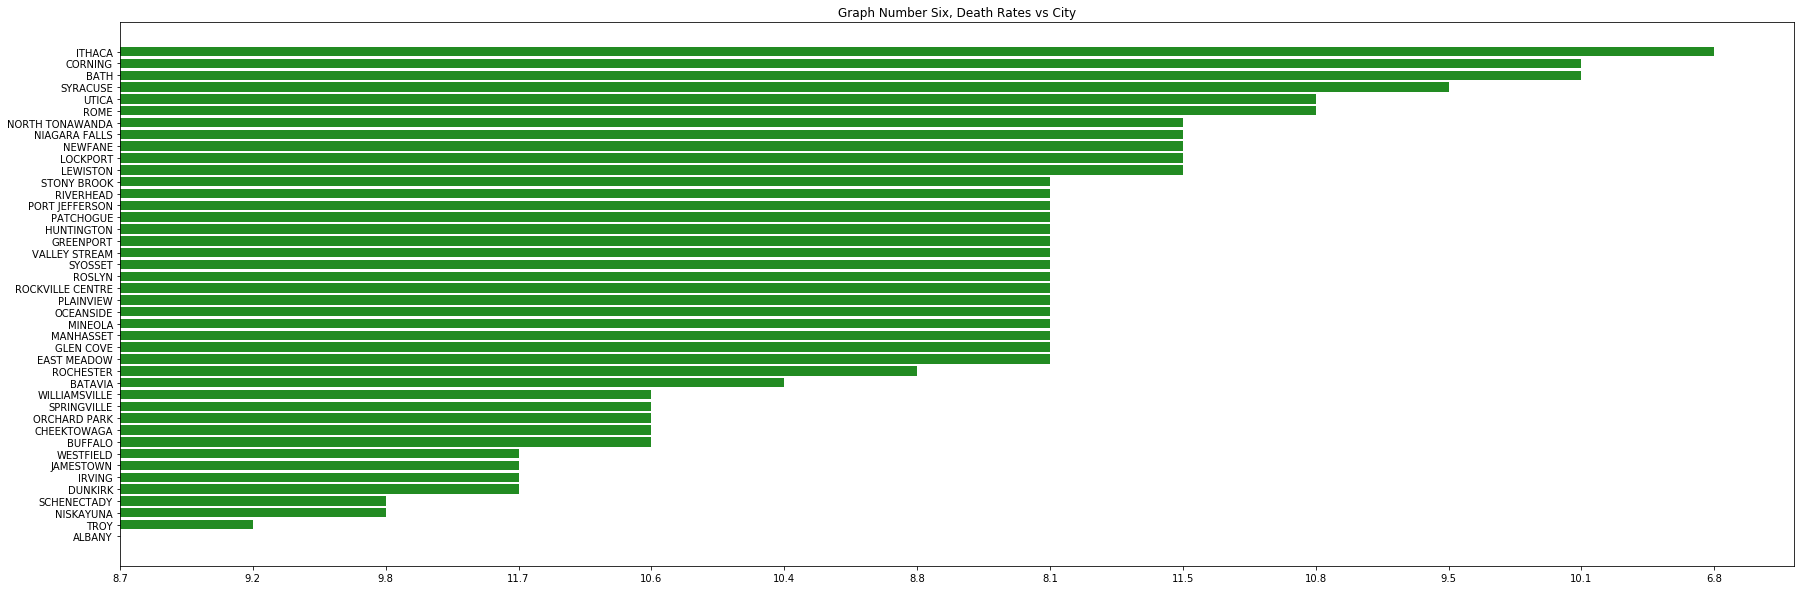

In [16]:
plt.figure(figsize=(30,10)) # This is to create the size of the graph
plt.barh(mergedfinal['CITY'],mergedfinal['2016'], color='forestgreen') # This is the actual code to create the graph for comparing the City with the death rates for 2016
plt.title('Graph Number Six, Death Rates vs City') # This creates the title for the graph
# The result should be a graph comparing the Cities and Death rates for each, again the X-axis is out of ordered so please read carefully. The first one will be Ithaca and the death rate will be 6.8%. 

We can see in the graph above, again I know it is hard to read the X-axis this time, that cities with bigger hospitals have lower death rates such as Ithaca and Rochester for example. We can see that places with big hospitals have a correlation between death rates and how big a hospital is. If we compare Rochester to Dunkirk there is about a 3% difference, Dunkirk being higher. Again not a huge difference but again 4.9% of 20,000 is now 1,200, which is 1,200 lives that could have continued to be productive members of society. 

In [17]:
mergedfinal.loc[mergedfinal["CITY"] == "ROCHESTER"] # Here you can replace 'ROCHESTER' with a different city to see the information on that city, as long as you capitlize it.

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
29,MONROE COMMUNITY HOSPITAL,435 E HENRIETTA RD,ROCHESTER,NY,14620,OPEN,MONROE,39,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
30,THE UNITY HOSPITAL OF ROCHESTER-ST MARYS CAMPUS,89 GENESEE STREET,ROCHESTER,NY,14611,OPEN,MONROE,40,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
31,HIGHLAND HOSPITAL,1000 SOUTH AVE,ROCHESTER,NY,14620,OPEN,MONROE,261,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
32,THE UNITY HOSPITAL OF ROCHESTER,1555 LONG POND ROAD,ROCHESTER,NY,14626,OPEN,MONROE,311,NOT AVAILABLE,NOT AVAILABLE,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
33,ROCHESTER GENERAL HOSPITAL,1425 PORTLAND AVE,ROCHESTER,NY,14621,OPEN,MONROE,528,NOT AVAILABLE,Y,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8
34,STRONG MEMORIAL HOSPITAL,601 ELMWOOD AVE,ROCHESTER,NY,14607,OPEN,MONROE,830,"I, I PEDIATRIC",Y,...,34483,6.4333,8.4,8.4,8.8,8.6,8.4,8.7,8.9,8.8


Text(0.5,1,'Graph Number Seven, Metro Area vs Death Rates')

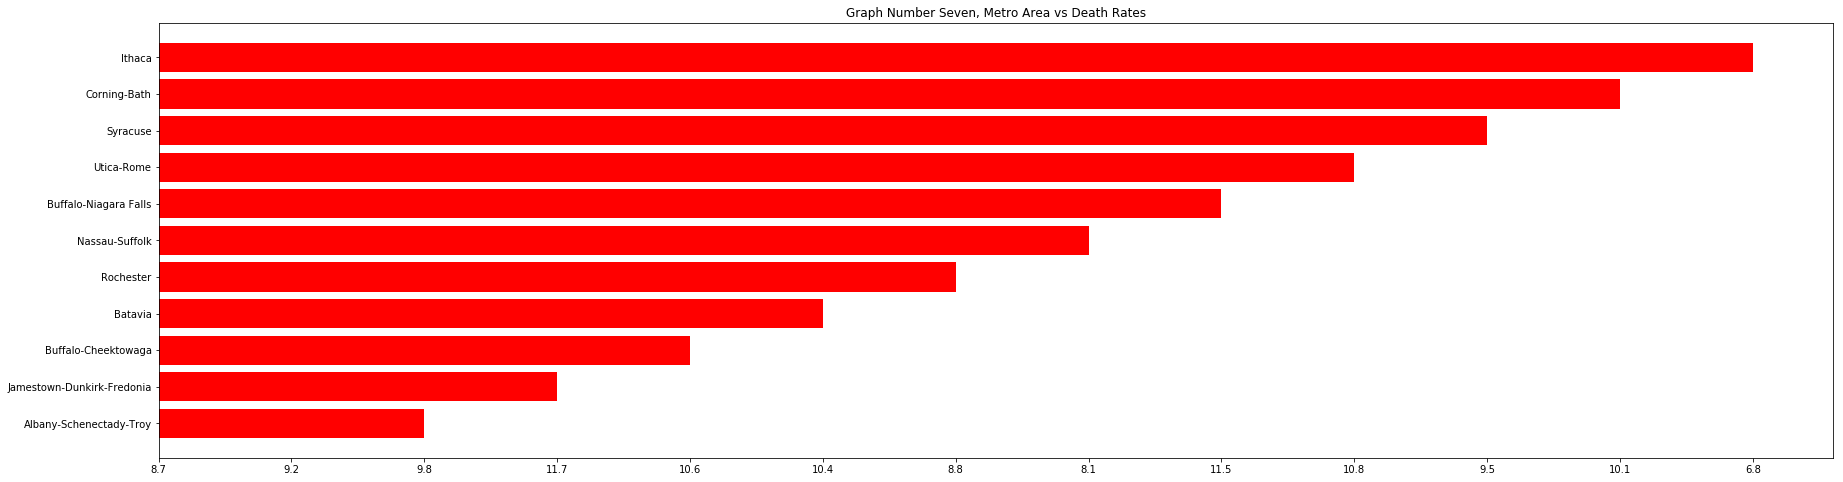

In [18]:
plt.figure(figsize=(30,8)) # This is creating the size for the graph
plt.barh(mergedfinal['Metro Area'],mergedfinal['2016'], color='red') # This is creates the graph comparing the Metro Area with the death rates for 2016 
plt.title("Graph Number Seven, Metro Area vs Death Rates") #This creates the title for the graph

In this graph above we can see that, again I need to fix the X-axis, that with the using the metro areas that death rates are still lower in places with bigger hospitals. If we look at metro areas, such as Ithaca with a 6.8% compared to Jamestown-Dunkirk-Fredonia with a 11.7 percent.The difference there is about 5% which is the biggest difference we have seen so far, which is 1,0000 live out of 20,000. That is 1,000 people who could have continued their lives if given the proper care. We see that the Metro Areas with bigger hospitals, in respect to how many beds they have seem to have a correlation with having lower death rates.

In [19]:
mergedfinal.loc[mergedfinal["Metro Area"] == "Ithaca"] # Here you can change "ITHACA" to a different Metro Area so you can explore the information such as the hospital infomration and death rates.  

,NAME,ADDRESS,CITY,STATE,ZIP,STATUS,COUNTY,BEDS,TRAUMA,HELIPAD,...,Average Unemployed,Average_Unemployment_Rate,2009,2010,2011,2012,2013,2014,2015,2016
68,CAYUGA MEDICAL CENTER,101 DATES DR,ITHACA,NY,14850,OPEN,TOMPKINS,212,NOT AVAILABLE,Y,...,3517,5.1008,5.9,6.6,6.2,6.7,6.4,6.6,6.5,6.8


# Conclusion

We can see the there is a correlation between both the unemployment rate, and death rates in respects to how big a hospital is. If we invest the ten million, it is quite possible that there will be in unemployment rates because they will need more staff for Brooks Memorial. It also possible that the death rates will decrease if we invest the $10 million in Brooks Memorial. Not only could this help the economic status of the Dunkirk Area, but it could also make people feel better about living in that area because there are no major hospitals there and people want to feel safe where ever they live. With that being said, although I have no proof, I would like to think that once there is a major hospital that because of that people will come. This being one of the limitations of the study, I would have loved to prove that building a hospital causes the population to increase the population. Unfortunately, a lot of hospitals were built in the 1800s and finding information on the populations than was a little more difficult than originally planned. People will come for jobs, to see their loved ones in that hospital, treatment and so forth. It would be a domino effect, but in my opinion and the data presented it could change the economic status of the Dunkirk area.
